In [16]:
#@title Importations

import random
import timeit
import time
import matplotlib.pyplot as plt
from collections import deque

In [4]:
#@title Fonctions

def inverser_chaine(chaine):
    mot_inverse = ""
    pile = []
    for c in chaine:
        pile.append(c)
    while len(pile) > 0:
        mot_inverse += pile.pop()
    return mot_inverse


In [5]:
#@title Exercice 3.1

class Pile:
    def __init__(self):
        self._elements = []

    def empiler(self, element):
        self._elements.append(element)
    
    def depiler(self):
        if self.est_vide():
            raise IndexError
        return self._elements.pop()
    
    def est_vide(self):
        return len(self._elements) == 0
    
une_pile = Pile()
try:
    print(une_pile.depiler())
except IndexError:
    print("La pile est vide")

for i in range(5):
    une_pile.empiler(i)

while not une_pile.est_vide():
    print(une_pile.depiler(), end=" ")
print()


La pile est vide
4 3 2 1 0 


In [6]:
#@title Exercice 3.2

# Aucun code nécessaire. Les deux méthodes sont en O(1)

In [7]:
#@title Exercice 3.3

def inverser_chaine_pile(chaine):
    mot_inverse = ""
    pile = Pile()
    for c in chaine:
        pile.empiler(c)
    while not pile.est_vide():
        mot_inverse += pile.depiler()
    return mot_inverse

mot_tres_long = "abcdef" * 10000

temps_liste = timeit.timeit(lambda: inverser_chaine(mot_tres_long), number=200)
temps_empiler = timeit.timeit(lambda: inverser_chaine_pile(mot_tres_long), number=200)

print(f"Temps avec liste: {temps_liste:.6f} secondes")
print(f"Temps avec pile : {temps_empiler:.6f} secondes")


# La pile devrait être moins performante.
# Principale raison:
#     Elle utilise la liste, il y a une indirection à chaque opération
#
# En développement logiciel, on est souvent prêt à sacrifier un peu de vitesse pour améliorer la clarté du code.


Temps avec liste: 1.984870 secondes
Temps avec pile : 4.170930 secondes


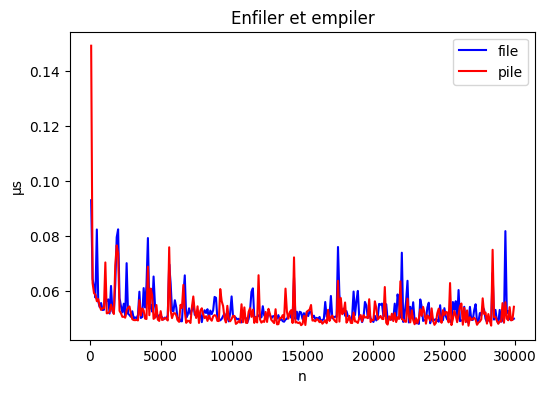

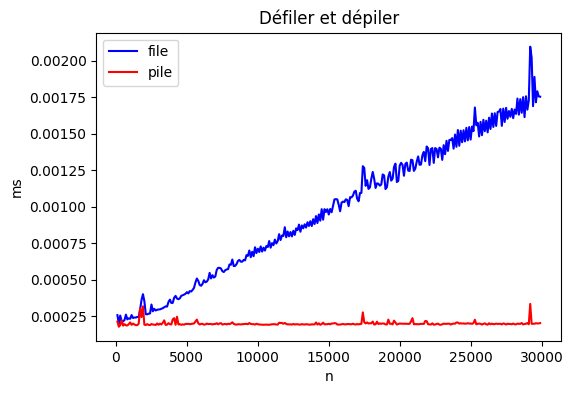

In [8]:
#@title Exercice 3.4

class File:
    def __init__(self):
        self._elements = []

    def enfiler(self, elem):
        self._elements.append(elem)

    def defiler(self):
        if self.est_vide():
            raise IndexError
        return self._elements.pop(0)

    def est_vide(self):
        return len(self._elements) == 0

def enfiler_elements(une_file, elements):
    for element in elements:
        une_file.enfiler(element)

def defiler_elements(une_file):
    while not une_file.est_vide():
        une_file.defiler()

def empiler_elements(une_pile, elements):
    for element in elements:
        une_pile.empiler(element)

def depiler_elements(une_pile):
    while not une_pile.est_vide():
        une_pile.depiler()

temps_empiler = []
temps_enfiler = []

temps_depiler = []
temps_defiler = []

quantite_donnees = list(range(100, 30000, 100))

for n in quantite_donnees:
    une_file = File()
    une_pile = Pile()
    elements = list(range(n))

    temps_execution_file = timeit.timeit(lambda: enfiler_elements(une_file, elements), number=1)
    temp_file = temps_execution_file / n   # On veut le coût moyen de l'opération quand n grandit
    temps_enfiler.append(temp_file * 1000000)

    temps_execution_pile = timeit.timeit(lambda: empiler_elements(une_pile, elements), number=1)
    temp_pile = temps_execution_pile / n
    temps_empiler.append(temp_pile * 1000000)

    temps_execution_file = timeit.timeit(lambda: defiler_elements(une_file), number=1)
    temp_file = temps_execution_file / n
    temps_defiler.append(temp_file * 1000)

    temps_execution_pile = timeit.timeit(lambda: depiler_elements(une_pile), number=1)
    temp_pile = temps_execution_pile / n
    temps_depiler.append(temp_pile * 1000)


plt.figure(figsize=(6,4))
plt.title("Enfiler et empiler")
plt.xlabel("n")
plt.ylabel("µs", rotation=90)
plt.plot(quantite_donnees, temps_enfiler, "-b", label="file")
plt.plot(quantite_donnees, temps_empiler, "-r", label="pile")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.title("Défiler et dépiler")
plt.xlabel("n")
plt.ylabel("ms", rotation=90)
plt.plot(quantite_donnees, temps_defiler, "-b", label="file")
plt.plot(quantite_donnees, temps_depiler, "-r", label="pile")
plt.legend()
plt.show()




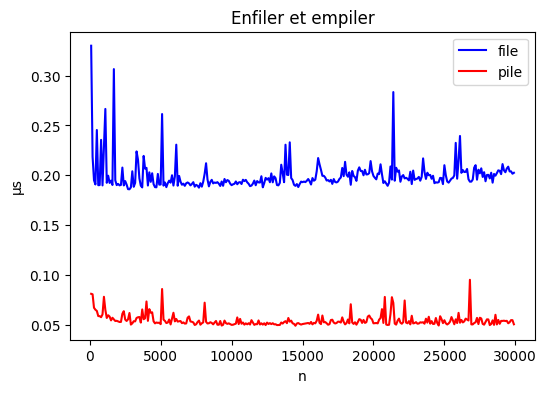

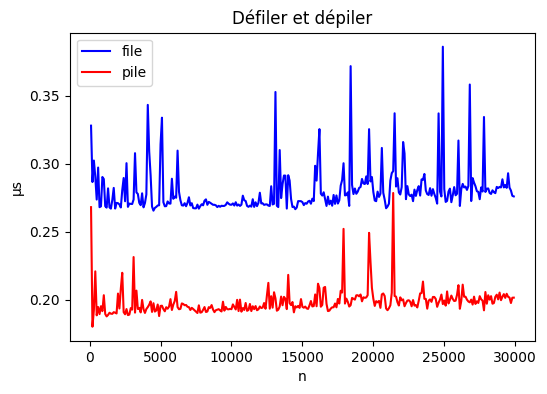

In [9]:
#@title Exercice 3.5

class Noeud:

    def __init__(self, element):
        self._element = element
        self._prochain = None

    def get_element(self):
        return self._element

    def set_prochain(self, prochain):
        self._prochain = prochain

    def get_prochain(self):
        return self._prochain
    
class FileChainee():
    def __init__(self):
        self._tete = None
        self._fin = None

    def enfiler(self, element):
        nouveau_noeud = Noeud(element)
        if self._fin == None:
            self._tete = nouveau_noeud
        else:
            self._fin.set_prochain(nouveau_noeud)
        self._fin = nouveau_noeud

    def defiler(self):
        if self.est_vide():
            raise IndexError
        valeur = self._tete.get_element()
        self._tete = self._tete.get_prochain()
        if self._tete == None:
            self._fin = None
        return valeur
    
    def est_vide(self):
        return self._tete == None

def enfiler_elements(une_file, elements):
    for element in elements:
        une_file.enfiler(element)

def defiler_elements(une_file):
    while not une_file.est_vide():
        une_file.defiler()

def empiler_elements(une_pile, elements):
    for element in elements:
        une_pile.empiler(element)

def depiler_elements(une_pile):
    while not une_pile.est_vide():
        une_pile.depiler()

temps_empiler = []
temps_enfiler = []

temps_depiler = []
temps_defiler = []

quantite_donnees = list(range(100, 30000, 100))

for n in quantite_donnees:
    une_file = FileChainee()
    une_pile = Pile()
    elements = list(range(n))

    temps_execution_file = timeit.timeit(lambda: enfiler_elements(une_file, elements), number=1)
    temp_file = temps_execution_file / n   # On veut le coût moyen de l'opération enfiler quand n grandit
    temps_enfiler.append(temp_file * 1000000)

    temps_execution_pile = timeit.timeit(lambda: empiler_elements(une_pile, elements), number=1)
    temp_pile = temps_execution_pile / n
    temps_empiler.append(temp_pile * 1000000)

    temps_execution_file = timeit.timeit(lambda: defiler_elements(une_file), number=1)
    temp_file = temps_execution_file / n
    temps_defiler.append(temp_file * 1000000)

    temps_execution_pile = timeit.timeit(lambda: depiler_elements(une_pile), number=1)
    temp_pile = temps_execution_pile / n
    temps_depiler.append(temp_pile * 1000000)


plt.figure(figsize=(6,4))
plt.title("Enfiler et empiler")
plt.xlabel("n")
plt.ylabel("µs", rotation=90)
plt.plot(quantite_donnees, temps_enfiler, "-b", label="file")
plt.plot(quantite_donnees, temps_empiler, "-r", label="pile")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.title("Défiler et dépiler")
plt.xlabel("n")
plt.ylabel("µs", rotation=90)
plt.plot(quantite_donnees, temps_defiler, "-b", label="file")
plt.plot(quantite_donnees, temps_depiler, "-r", label="pile")
plt.legend()
plt.show()


In [11]:
#@title Exercice 3.6

def inverser_pile(une_pile):
    une_file = FileChainee()
    while not une_pile.est_vide():
        une_file.enfiler(une_pile.depiler())
    while not une_file.est_vide():
        une_pile.empiler(une_file.defiler())

une_pile = Pile()
for i in range(10):
    une_pile.empiler(i)

inverser_pile(une_pile)

while not une_pile.est_vide():
    print(une_pile.depiler(), end=" ")
print()


0 1 2 3 4 5 6 7 8 9 


In [ ]:
#@title Exercice 3.7

def compter_elements_file(une_file):
    fileTemp = FileChainee()
    compteur = 0
    while not une_file.est_vide():
        fileTemp.enfiler(une_file.defiler())
        compteur += 1
    while not fileTemp.est_vide():
        une_file.enfiler(fileTemp.defiler())
    return compteur

la_file = FileChainee()
for i in range(10):
    la_file.enfiler(i)

taille = compter_elements_file(la_file)
print("Il y a", taille, "éléments dans la file.")

# La complexité temporelle est O(n)

Il y a 10 éléments dans la file.


In [14]:
#@title Exercice 3.8

# On va ajouter un service dans la classe File qui va permettre de retourner la taille de la liste.
# On va utiliser la méthode magique __len__ pour retourner la taille de la liste.

class FileChainee():
    def __init__(self):
        self._tete = None
        self._fin = None
        self._taille = 0

    def __len__(self):
        return self._taille

    def enfiler(self, element):
        nouveau_noeud = Noeud(element)
        if self._fin == None:
            self._tete = nouveau_noeud
        else:
            self._fin.set_prochain(nouveau_noeud)
        self._fin = nouveau_noeud
        self._taille += 1

    def defiler(self):
        if self.est_vide():
            raise IndexError
        valeur = self._tete.get_element()
        self._tete = self._tete.get_prochain()
        if self._tete == None:
            self._fin = None
        self._taille -= 1
        return valeur
    
    def est_vide(self):
        return self._tete == None
    

la_file = FileChainee()
for i in range(10):
    la_file.enfiler(i)

taille = len(la_file)
print("Il y a", taille, "éléments dans la file.")


Il y a 10 éléments dans la file.


In [25]:
#@title Exercice 3.9

NOMBRE_ELEMENTS = 1000000
NOMBRE_ACCES = 200000

la_liste = list(range(NOMBRE_ELEMENTS))
le_deque = deque(range(NOMBRE_ELEMENTS))

indices_acces = list()
for i in range(NOMBRE_ACCES):
    indice = random.randint(0, NOMBRE_ELEMENTS -1)
    indices_acces.append(indice)

avant = time.perf_counter()
for indice in indices_acces:
    une_valeur = la_liste[indice]
apres = time.perf_counter()
print(f"La liste prend {(apres-avant) * 1000000 / NOMBRE_ACCES:.4g} µs par accès.")

avant = time.perf_counter()
for indice in indices_acces:
    une_valeur = le_deque[indice]
apres = time.perf_counter()
print(f"Le deque prend {(apres-avant) * 1000000 / NOMBRE_ACCES:.4g} µs par accès.")

# Les deux opérations semblent être en O(1) mais le deque est grosso modo 100 fois plus lent.

La liste prend 0.2645 µs par accès.
Le deque prend 28.29 µs par accès.
